In [6]:
%pip install wordcloud --break-system-packages

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "full_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Preview the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB
None
         Unnamed: 0
count  2.231142e+06
mean   1.115570e+06
std    6.440754e+05
min    0.000000e+00
25%    5.577852e+05
50%    1.115570e+06
75%    1.673356e+06
max    2.231141e+06
   Unnamed: 0                  title  \
0           0    No-Bake Nut Cookies   
1           1  Jewell Ball'S Chicken   
2           2            Creamy Corn   
3           3          Chicken Funny   
4           4   Reeses Cups(Candy)     

                                         ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) p

In [6]:
# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)
example_row = df.iloc[100467]
print(example_row)

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                100467
title                                                                                                                                                                                                                                                                                                                                                                                                                                      Chocolate Eclair Cake
ingredients                                                                                           

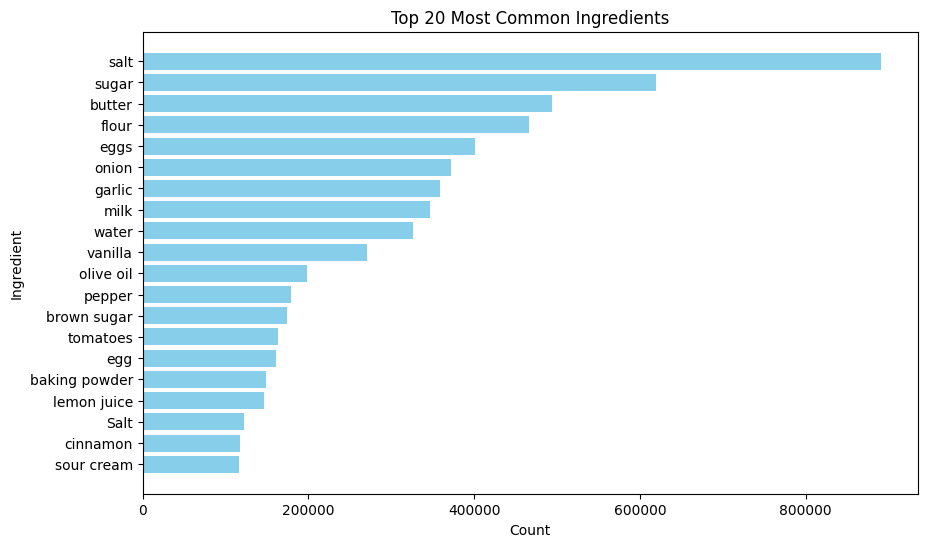

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Convert the 'NER' column (which seems to contain lists in string format) back into lists
df['NER'] = df['NER'].apply(ast.literal_eval)

# Flatten the list of ingredients
all_ingredients = [ingredient for sublist in df['NER'] for ingredient in sublist]

# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

# Get the top 20 most common ingredients
most_common_ingredients = ingredient_counts.most_common(20)

# Convert to a DataFrame for easier plotting
ingredients_df = pd.DataFrame(most_common_ingredients, columns=['Ingredient', 'Count'])

# Plot the top 20 ingredients
plt.figure(figsize=(10, 6))
plt.barh(ingredients_df['Ingredient'], ingredients_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.title('Top 20 Most Common Ingredients')
plt.gca().invert_yaxis()
plt.show()


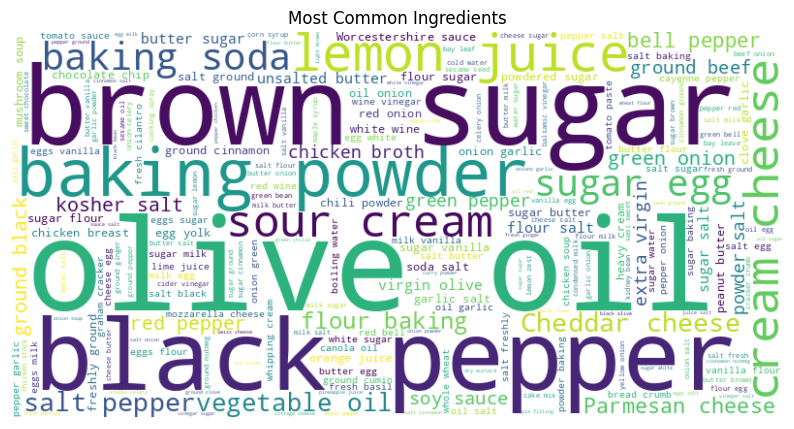

In [7]:
from wordcloud import WordCloud

# Create a single string of all ingredients
all_ingredients_str = ' '.join(all_ingredients)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients_str)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ingredients')
plt.show()


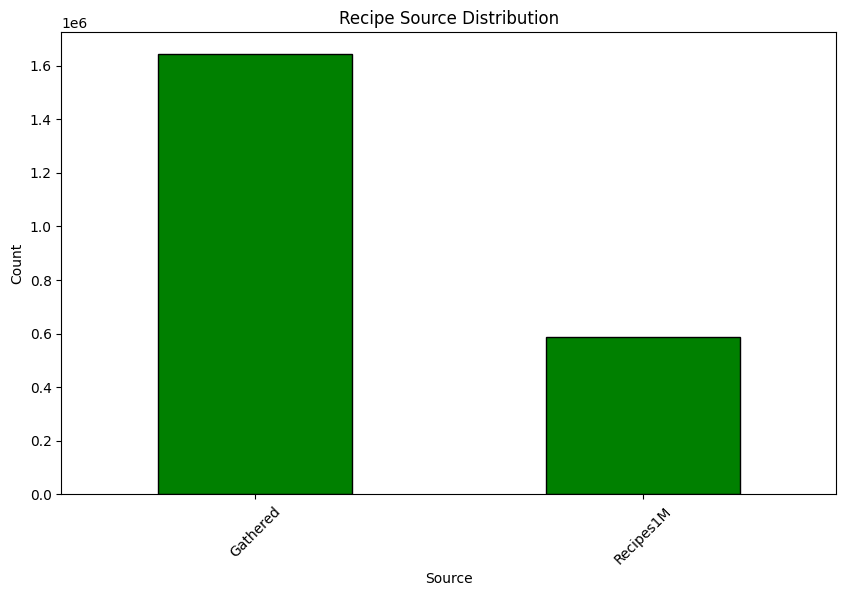

In [8]:
# Count the number of recipes from each source
source_counts = df['source'].value_counts()

# Plot the top sources
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Recipe Source Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


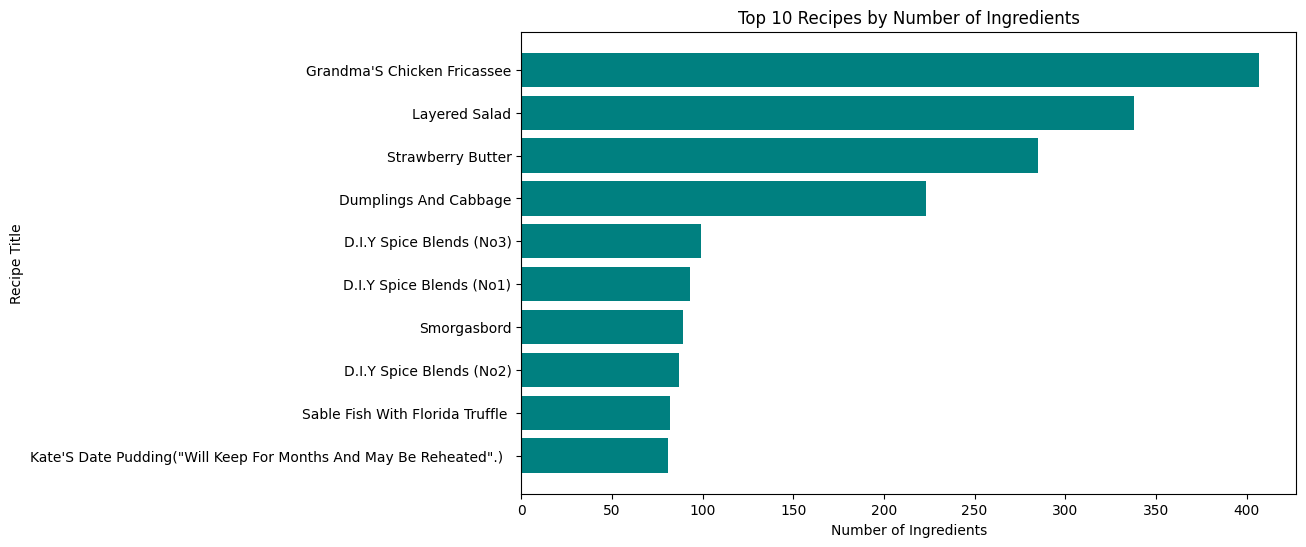

In [10]:
# Get top 10 recipes with the highest number of ingredients
top_recipes = df.nlargest(10, 'num_ingredients')[['title', 'num_ingredients']]

# Display as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_recipes['title'], top_recipes['num_ingredients'], color='teal')
plt.xlabel('Number of Ingredients')
plt.ylabel('Recipe Title')
plt.title('Top 10 Recipes by Number of Ingredients')
plt.gca().invert_yaxis()
plt.show()
